In [220]:
import pandas as pd

# df = pd.read_csv('./data/test_df.csv', encoding='cp949')
df = pd.read_csv('./data/whole_df.csv')
df.drop(columns="Unnamed: 0", inplace=True)
# df["날짜"] = pd.to_datetime(df["날짜"], format='%Y%m')      # 데이터 타입 datetime으로 변경
# df["날짜"] = df["날짜"].dt.strftime('%Y%m') # datetime 형식 설정
# df.set_index("날짜", inplace=True)          # 날짜 컬럼 인덱스 설정

df.head()

,날짜,서적/문구,소비자물가지수,소매판매지수,동월_평균_등락률,전체_평균_대비,소비,월,전년_동월_대비
0,201212,0.118333,0.001782,0.023590,0.164177,1,1,12,1.0
1,201301,-0.069215,0.005999,-0.086172,-0.077975,0,0,1,0.0
2,201302,-0.107126,0.003343,-0.048246,-0.093226,0,0,2,0.0
3,201303,0.471158,-0.000924,0.078341,0.390163,1,1,3,1.0
4,201304,-0.204835,-0.001388,-0.018162,-0.222949,0,1,4,0.0


In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
ss.fit(data)

StandardScaler()

In [31]:
data_scaled = ss.transform(data)

In [32]:
params = {'C':[0, 0.1, 1, 10, 20]}

In [33]:
lr = LogisticRegression()
rg = Ridge()
ls = Lasso()
logisticreg = LogisticRegression()
detreec = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
# xgb = XGBClassifier()

In [34]:
splitter = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
scores_logistic = cross_validate(lr, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_ridge = cross_validate(rg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_lasso = cross_validate(ls, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_logisticreg = cross_validate(logisticreg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_dectree = cross_validate(detreec, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_randomforest = cross_validate(randomforest, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
# scores_xgb = cross_validate(xgb, data, target, cv=splitter, n_jobs=-1, return_train_score=True)

In [35]:
print('로지스틱 train data score : ',np.mean(scores_logistic['train_score'])) 
print('로지스틱 test data score : ',np.mean(scores_logistic['test_score']))  
print('릿지 train data score : ',np.mean(scores_ridge['train_score'])) 
print('릿지 test data score : ',np.mean(scores_ridge['test_score']))  
print('라쏘 train data score : ', np.mean(scores_lasso['train_score'])) 
print('라쏘 test data score : ', np.mean(scores_lasso['test_score'])) 
print('결정트리(Decision Tree) train data score : ',np.mean(scores_dectree['train_score']))
print('결정트리(Decision Tree) test data score : ',np.mean(scores_dectree['test_score']))
print('랜덤포레스트 train data score : ',np.mean(scores_randomforest['train_score']))
print('랜덤포레스트 test data score : ',np.mean(scores_randomforest['test_score']))
# print('XGB train data score : ',np.mean(scores_xgb['train_score']))
# print('XGB test data score : ',np.mean(scores_xgb['test_score']))

로지스틱 train data score :  0.6941314553990611
로지스틱 test data score :  0.6944444444444445
릿지 train data score :  0.5011621032217423
릿지 test data score :  0.4624484634351287
라쏘 train data score :  0.0023680243561094625
라쏘 test data score :  -0.02511630804150448
결정트리(Decision Tree) train data score :  1.0
결정트리(Decision Tree) test data score :  0.9285714285714285
랜덤포레스트 train data score :  1.0
랜덤포레스트 test data score :  0.9055555555555554


In [222]:
data = df[["날짜", "서적/문구", "소비자물가지수", "소매판매지수", "전년_동월_대비"]]
target = df["소비"]

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         111 non-null    int64  
 1   서적/문구      111 non-null    float64
 2   소비자물가지수    111 non-null    float64
 3   소매판매지수     111 non-null    float64
 4   동월_평균_등락률  111 non-null    float64
 5   전체_평균_대비   111 non-null    int64  
 6   소비         111 non-null    int64  
 7   월          111 non-null    int64  
 8   전년_동월_대비   111 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 7.9 KB


In [229]:
# 데이터 셋 분리

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state=11)


In [237]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(77, 5), 테스트 세트 Shape:(34, 5)
 학습 세트 레이블 값 분포 비율
1    0.662338
0    0.337662
Name: 소비, dtype: float64

 테스트 세트 레이블 값 분포 비율
1    0.324675
0    0.116883
Name: 소비, dtype: float64


### DecisionTree

In [248]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [249]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [250]:
X_pred = dt_clf.predict(X_test)
X_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [251]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 1.0000


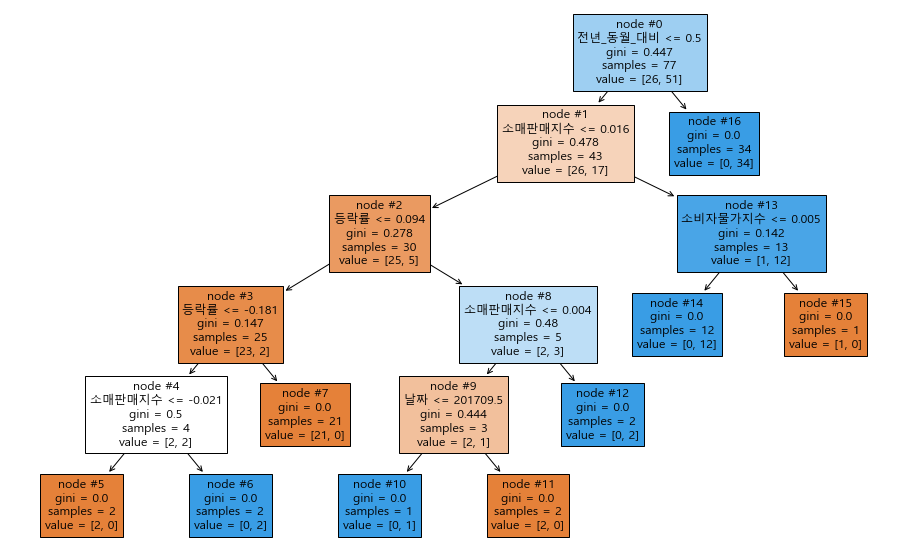

In [252]:
from sklearn.tree import plot_tree

feature_names = ["날짜", "등락률", "소비자물가지수", "소매판매지수",  "전년_동월_대비"]

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))
plot_tree(dt_clf, filled=True, feature_names=feature_names, node_ids=True)
plt.show()

In [253]:
dt_clf.feature_importances_

array([0.03871292, 0.11420312, 0.05360251, 0.39038068, 0.40310078])

<AxesSubplot:title={'center':'피처중요도'}>

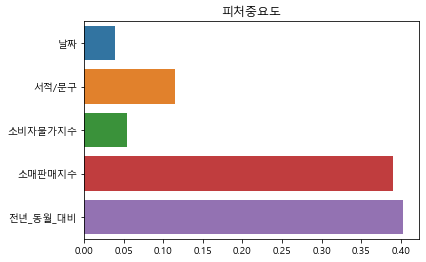

In [254]:
# 피처 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.title("피처중요도")
sns.barplot(x=dt_clf.feature_importances_, y=data.columns)

### 데이터 수동 분리

In [279]:
num_of_train = int(len(data) * 0.7)
num_of_test = int(len(data) - num_of_train)

print('훈련 데이터 크기:', num_of_train)
print('테스트 데이터 크기:', num_of_test)

훈련 데이터 크기: 77
테스트 데이터 크기: 34


In [280]:
X_train = data[:num_of_train] 
X_test = data[num_of_train:] 
y_train = target[:num_of_train] 
y_test = target[num_of_train:] 

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
         날짜     서적/문구   소비자물가지수    소매판매지수  전년_동월_대비
77   201905  0.005815  0.001719  0.046679       0.0
78   201906 -0.044019 -0.001616 -0.056604       1.0
79   201907  0.077752 -0.003056  0.004545       0.0
80   201908 -0.016262  0.002400  0.009050       1.0
81   201909 -0.024028  0.003711  0.016143       0.0
82   201910 -0.033313  0.002475  0.021183       1.0
83   201911  0.021241 -0.005598  0.040622       1.0
84   201912  0.121899  0.002392  0.009967       0.0
85   202001 -0.061820  0.003720 -0.080592       0.0
86   202002 -0.108362  0.000699 -0.125224       0.0
87   202003 -0.049071 -0.002196  0.093047       0.0
88   202004  0.034980 -0.004403  0.018709       1.0
89   202005  0.107948 -0.000603  0.087236       1.0
90   202006 -0.084113  0.002715 -0.012669       0.0
91   202007  0.011341 -0.000802 -0.051326       0.0
92   202008 -0.029148  0.005621  0.007214       0.0
93   202009 -0.006505  0.005490  0.056401       1.0
94   202010 -0.051901 -0.005559 -0.018644       0.0


### 코로나 전, 후 데이터 분리

In [286]:
X_train = data[:84] 
X_test = data[85:] 
y_train = target[:84] 
y_test = target[85:] 

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
         날짜     서적/문구   소비자물가지수    소매판매지수  전년_동월_대비
85   202001 -0.061820  0.003720 -0.080592       0.0
86   202002 -0.108362  0.000699 -0.125224       0.0
87   202003 -0.049071 -0.002196  0.093047       0.0
88   202004  0.034980 -0.004403  0.018709       1.0
89   202005  0.107948 -0.000603  0.087236       1.0
90   202006 -0.084113  0.002715 -0.012669       0.0
91   202007  0.011341 -0.000802 -0.051326       0.0
92   202008 -0.029148  0.005621  0.007214       0.0
93   202009 -0.006505  0.005490  0.056401       1.0
94   202010 -0.051901 -0.005559 -0.018644       0.0
95   202011 -0.005193 -0.000898  0.027634       0.0
96   202012  0.120831  0.002398  0.000840       0.0
97   202101 -0.010869  0.007077 -0.057935       1.0
98   202102 -0.091223  0.005344 -0.053476       1.0
99   202103  0.341261  0.002560  0.125235       1.0
100  202104 -0.195506  0.001375 -0.005021       0.0
101  202105  0.045043  0.000686  0.032801       0.0
102  202106 -0.077637  0.000000 -0.026873       1.0


In [287]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [288]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [289]:
X_pred = dt_clf.predict(X_test)
X_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0], dtype=int64)

In [290]:
y_test

85     0
86     0
87     1
88     1
89     1
90     0
91     0
92     0
93     1
94     0
95     1
96     0
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    0
105    1
106    1
107    0
108    1
109    0
110    0
Name: 소비, dtype: int64

In [291]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 0.9231


### XGBClassifier

In [292]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=100, random_state=11)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.98160	validation_1-auc:0.96364
[1]	validation_0-auc:0.98160	validation_1-auc:0.96364
[2]	validation_0-auc:0.99236	validation_1-auc:0.96364
[3]	validation_0-auc:0.99583	validation_1-auc:0.95758
[4]	validation_0-auc:0.99653	validation_1-auc:0.97576
[5]	validation_0-auc:0.99653	validation_1-auc:0.97576
[6]	validation_0-auc:0.99653	validation_1-auc:0.97576
[7]	validation_0-auc:0.99722	validation_1-auc:0.97273
[8]	validation_0-auc:0.99722	validation_1-auc:0.98182
[9]	validation_0-auc:0.99792	validation_1-auc:0.98788
[10]	validation_0-auc:0.99792	validation_1-auc:0.98788
[11]	validation_0-auc:0.99861	validation_1-auc:0.98788
[12]	validation_0-auc:0.99861	validation_1-auc:0.98788


c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.99931	validation_1-auc:0.98788
[14]	validation_0-auc:0.99931	validation_1-auc:0.98788
[15]	validation_0-auc:0.99931	validation_1-auc:0.98788
[16]	validation_0-auc:0.99931	validation_1-auc:0.98788
[17]	validation_0-auc:0.99931	validation_1-auc:0.98788
[18]	validation_0-auc:1.00000	validation_1-auc:0.98788
[19]	validation_0-auc:1.00000	validation_1-auc:0.98788
[20]	validation_0-auc:1.00000	validation_1-auc:0.98788
[21]	validation_0-auc:1.00000	validation_1-auc:0.98182
[22]	validation_0-auc:1.00000	validation_1-auc:0.98182
[23]	validation_0-auc:1.00000	validation_1-auc:0.98182
[24]	validation_0-auc:1.00000	validation_1-auc:0.98182
[25]	validation_0-auc:1.00000	validation_1-auc:0.98182
[26]	validation_0-auc:1.00000	validation_1-auc:0.97576
[27]	validation_0-auc:1.00000	validation_1-auc:0.97576
[28]	validation_0-auc:1.00000	validation_1-auc:0.96970
[29]	validation_0-auc:1.00000	validation_1-auc:0.96970
[30]	validation_0-auc:1.00000	validation_1-auc:0.96970
[31]	valid

### GridSearchCV

In [293]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1, 3], 'colsample_bytree':[0.5, 0.75]}

gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", 
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83194	validation_1-auc:0.84848


c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.83194	validation_1-auc:0.84848
[2]	validation_0-auc:0.88715	validation_1-auc:0.90909
[3]	validation_0-auc:0.95764	validation_1-auc:0.95455
[4]	validation_0-auc:0.96528	validation_1-auc:0.94848
[5]	validation_0-auc:0.96736	validation_1-auc:0.94848
[6]	validation_0-auc:0.95799	validation_1-auc:0.94848
[7]	validation_0-auc:0.97396	validation_1-auc:0.95455
[8]	validation_0-auc:0.97951	validation_1-auc:0.95152
[9]	validation_0-auc:0.98646	validation_1-auc:0.96970
[10]	validation_0-auc:0.98854	validation_1-auc:0.98182
[11]	validation_0-auc:0.98715	validation_1-auc:0.97576
[12]	validation_0-auc:0.98924	validation_1-auc:0.98788
[13]	validation_0-auc:0.98924	validation_1-auc:0.98182
[14]	validation_0-auc:0.98924	validation_1-auc:0.97576
[15]	validation_0-auc:0.98924	validation_1-auc:0.98182
[16]	validation_0-auc:0.98924	validation_1-auc:0.98182
[17]	validation_0-auc:0.98924	validation_1-auc:0.98182
[18]	validation_0-auc:0.98924	validation_1-auc:0.98182
[19]	validation_0-a

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.99028	validation_1-auc:0.96970
[10]	validation_0-auc:0.99167	validation_1-auc:0.96970
[11]	validation_0-auc:0.99236	validation_1-auc:0.96364
[12]	validation_0-auc:0.99236	validation_1-auc:0.96970
[13]	validation_0-auc:0.99306	validation_1-auc:0.98182
[14]	validation_0-auc:0.99375	validation_1-auc:0.96364
[15]	validation_0-auc:0.99444	validation_1-auc:0.96364
[16]	validation_0-auc:0.99514	validation_1-auc:0.96364
[17]	validation_0-auc:0.99375	validation_1-auc:0.95152
[18]	validation_0-auc:0.99444	validation_1-auc:0.96364
[19]	validation_0-auc:0.99653	validation_1-auc:0.96364
[20]	validation_0-auc:0.99653	validation_1-auc:0.97576
[21]	validation_0-auc:0.99653	validation_1-auc:0.97576
[22]	validation_0-auc:0.99722	validation_1-auc:0.97576
[23]	validation_0-auc:0.99722	validation_1-auc:0.97576
[24]	validation_0-auc:0.99722	validation_1-auc:0.97576
[25]	validation_0-auc:0.99653	validation_1-auc:0.97576
[26]	validation_0-auc:0.99653	validation_1-auc:0.97576
[27]	valida

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-auc:0.96111	validation_1-auc:0.98788
[11]	validation_0-auc:0.95903	validation_1-auc:0.98182
[12]	validation_0-auc:0.96528	validation_1-auc:0.98182
[13]	validation_0-auc:0.96389	validation_1-auc:0.97576
[14]	validation_0-auc:0.96389	validation_1-auc:0.97576
[15]	validation_0-auc:0.96736	validation_1-auc:0.96970
[16]	validation_0-auc:0.96875	validation_1-auc:0.96970
[17]	validation_0-auc:0.96875	validation_1-auc:0.96970
[18]	validation_0-auc:0.96736	validation_1-auc:0.96364
[19]	validation_0-auc:0.97500	validation_1-auc:0.96970
[20]	validation_0-auc:0.97778	validation_1-auc:0.96970
[21]	validation_0-auc:0.97639	validation_1-auc:0.96970
[22]	validation_0-auc:0.97639	validation_1-auc:0.96970
[23]	validation_0-auc:0.97569	validation_1-auc:0.96364
[24]	validation_0-auc:0.97708	validation_1-auc:0.96364
[25]	validation_0-auc:0.97569	validation_1-auc:0.96364
[26]	validation_0-auc:0.97708	validation_1-auc:0.96364
[27]	validation_0-auc:0.97847	validation_1-auc:0.96364
[28]	valid

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.97569	validation_1-auc:0.96364
[13]	validation_0-auc:0.97639	validation_1-auc:0.95758
[14]	validation_0-auc:0.97569	validation_1-auc:0.95758
[15]	validation_0-auc:0.97500	validation_1-auc:0.95758
[16]	validation_0-auc:0.97569	validation_1-auc:0.95758
[17]	validation_0-auc:0.97500	validation_1-auc:0.95758
[18]	validation_0-auc:0.97604	validation_1-auc:0.96970
[19]	validation_0-auc:0.97917	validation_1-auc:0.96970
[20]	validation_0-auc:0.98056	validation_1-auc:0.96364
[21]	validation_0-auc:0.97986	validation_1-auc:0.95758
[22]	validation_0-auc:0.97986	validation_1-auc:0.95758
[23]	validation_0-auc:0.98194	validation_1-auc:0.95758
[24]	validation_0-auc:0.98264	validation_1-auc:0.95758
[25]	validation_0-auc:0.98264	validation_1-auc:0.95758
[26]	validation_0-auc:0.98194	validation_1-auc:0.95758
[27]	validation_0-auc:0.98403	validation_1-auc:0.95758
[28]	validation_0-auc:0.98611	validation_1-auc:0.96364
[29]	validation_0-auc:0.98403	validation_1-auc:0.95758
[30]	valid

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.97292	validation_1-auc:0.96970
[15]	validation_0-auc:0.97014	validation_1-auc:0.96364
[16]	validation_0-auc:0.97465	validation_1-auc:0.96364
[17]	validation_0-auc:0.97396	validation_1-auc:0.96364
[18]	validation_0-auc:0.97500	validation_1-auc:0.96364
[19]	validation_0-auc:0.97708	validation_1-auc:0.96364
[20]	validation_0-auc:0.97708	validation_1-auc:0.96364
[21]	validation_0-auc:0.97500	validation_1-auc:0.96364
[22]	validation_0-auc:0.97500	validation_1-auc:0.96364
[23]	validation_0-auc:0.97569	validation_1-auc:0.96364
[24]	validation_0-auc:0.97917	validation_1-auc:0.96364
[25]	validation_0-auc:0.97778	validation_1-auc:0.96364
[26]	validation_0-auc:0.98056	validation_1-auc:0.96364
[27]	validation_0-auc:0.98194	validation_1-auc:0.96364
[28]	validation_0-auc:0.98264	validation_1-auc:0.96364
[29]	validation_0-auc:0.98056	validation_1-auc:0.96364
[30]	validation_0-auc:0.98125	validation_1-auc:0.96364
[31]	validation_0-auc:0.98125	validation_1-auc:0.96364
[32]	valid

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.91910	validation_1-auc:0.93939
[15]	validation_0-auc:0.91910	validation_1-auc:0.93939
[16]	validation_0-auc:0.92118	validation_1-auc:0.93939
[17]	validation_0-auc:0.92118	validation_1-auc:0.93939
[18]	validation_0-auc:0.92049	validation_1-auc:0.93939
[19]	validation_0-auc:0.92257	validation_1-auc:0.93939
[20]	validation_0-auc:0.92326	validation_1-auc:0.93939
[21]	validation_0-auc:0.92188	validation_1-auc:0.93939
[22]	validation_0-auc:0.92188	validation_1-auc:0.93939
[23]	validation_0-auc:0.92188	validation_1-auc:0.93939
[24]	validation_0-auc:0.92326	validation_1-auc:0.93939
[25]	validation_0-auc:0.92326	validation_1-auc:0.93939
[26]	validation_0-auc:0.92326	validation_1-auc:0.93333
[27]	validation_0-auc:0.92326	validation_1-auc:0.93333
[28]	validation_0-auc:0.92326	validation_1-auc:0.93333
[29]	validation_0-auc:0.92326	validation_1-auc:0.93333
[30]	validation_0-auc:0.92326	validation_1-auc:0.93333
[31]	validation_0-auc:0.92326	validation_1-auc:0.93333
[32]	valid

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.98646	validation_1-auc:0.96970
[10]	validation_0-auc:0.98854	validation_1-auc:0.98182
[11]	validation_0-auc:0.98715	validation_1-auc:0.97576
[12]	validation_0-auc:0.98924	validation_1-auc:0.98788
[13]	validation_0-auc:0.98924	validation_1-auc:0.98182
[14]	validation_0-auc:0.98924	validation_1-auc:0.97576
[15]	validation_0-auc:0.98924	validation_1-auc:0.98182
[16]	validation_0-auc:0.98924	validation_1-auc:0.98182
[17]	validation_0-auc:0.98924	validation_1-auc:0.98182
[18]	validation_0-auc:0.98924	validation_1-auc:0.98182
[19]	validation_0-auc:0.98924	validation_1-auc:0.98182
[20]	validation_0-auc:0.99062	validation_1-auc:0.98182
[21]	validation_0-auc:0.99062	validation_1-auc:0.98182
[22]	validation_0-auc:0.99062	validation_1-auc:0.98182
[23]	validation_0-auc:0.99132	validation_1-auc:0.98182
[24]	validation_0-auc:0.99132	validation_1-auc:0.98182
[25]	validation_0-auc:0.99062	validation_1-auc:0.98182
[26]	validation_0-auc:0.99062	validation_1-auc:0.98182
[27]	valida

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.96424	validation_1-auc:0.93333
[5]	validation_0-auc:0.95451	validation_1-auc:0.93333
[6]	validation_0-auc:0.96007	validation_1-auc:0.92727
[7]	validation_0-auc:0.97674	validation_1-auc:0.93333
[8]	validation_0-auc:0.97708	validation_1-auc:0.93939
[9]	validation_0-auc:0.99028	validation_1-auc:0.96970
[10]	validation_0-auc:0.99167	validation_1-auc:0.96970
[11]	validation_0-auc:0.99236	validation_1-auc:0.96364
[12]	validation_0-auc:0.99236	validation_1-auc:0.96970
[13]	validation_0-auc:0.99306	validation_1-auc:0.98182
[14]	validation_0-auc:0.99375	validation_1-auc:0.96364
[15]	validation_0-auc:0.99444	validation_1-auc:0.96364
[16]	validation_0-auc:0.99514	validation_1-auc:0.96364
[17]	validation_0-auc:0.99375	validation_1-auc:0.95152
[18]	validation_0-auc:0.99444	validation_1-auc:0.96364
[19]	validation_0-auc:0.99653	validation_1-auc:0.96364
[20]	validation_0-auc:0.99653	validation_1-auc:0.97576
[21]	validation_0-auc:0.99653	validation_1-auc:0.97576
[22]	validation_

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.93889	validation_1-auc:0.96667
[4]	validation_0-auc:0.93403	validation_1-auc:0.96061
[5]	validation_0-auc:0.92917	validation_1-auc:0.96061
[6]	validation_0-auc:0.92708	validation_1-auc:0.96061
[7]	validation_0-auc:0.94514	validation_1-auc:0.99091
[8]	validation_0-auc:0.95382	validation_1-auc:0.97273
[9]	validation_0-auc:0.96076	validation_1-auc:0.98182
[10]	validation_0-auc:0.96111	validation_1-auc:0.98788
[11]	validation_0-auc:0.95903	validation_1-auc:0.98182
[12]	validation_0-auc:0.96528	validation_1-auc:0.98182
[13]	validation_0-auc:0.96389	validation_1-auc:0.97576
[14]	validation_0-auc:0.96389	validation_1-auc:0.97576
[15]	validation_0-auc:0.96736	validation_1-auc:0.96970
[16]	validation_0-auc:0.96875	validation_1-auc:0.96970
[17]	validation_0-auc:0.96875	validation_1-auc:0.96970
[18]	validation_0-auc:0.96736	validation_1-auc:0.96364
[19]	validation_0-auc:0.97500	validation_1-auc:0.96970
[20]	validation_0-auc:0.97778	validation_1-auc:0.96970
[21]	validation_0

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.94618	validation_1-auc:0.94242
[5]	validation_0-auc:0.94618	validation_1-auc:0.94242
[6]	validation_0-auc:0.95451	validation_1-auc:0.94242
[7]	validation_0-auc:0.96146	validation_1-auc:0.94848
[8]	validation_0-auc:0.96215	validation_1-auc:0.94545
[9]	validation_0-auc:0.96979	validation_1-auc:0.94545
[10]	validation_0-auc:0.96528	validation_1-auc:0.95455
[11]	validation_0-auc:0.97361	validation_1-auc:0.95758
[12]	validation_0-auc:0.97569	validation_1-auc:0.96364
[13]	validation_0-auc:0.97639	validation_1-auc:0.95758
[14]	validation_0-auc:0.97569	validation_1-auc:0.95758
[15]	validation_0-auc:0.97500	validation_1-auc:0.95758
[16]	validation_0-auc:0.97569	validation_1-auc:0.95758
[17]	validation_0-auc:0.97500	validation_1-auc:0.95758
[18]	validation_0-auc:0.97604	validation_1-auc:0.96970
[19]	validation_0-auc:0.97917	validation_1-auc:0.96970
[20]	validation_0-auc:0.98056	validation_1-auc:0.96364
[21]	validation_0-auc:0.97986	validation_1-auc:0.95758
[22]	validation_

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.84375	validation_1-auc:0.85152
[3]	validation_0-auc:0.93576	validation_1-auc:0.93030
[4]	validation_0-auc:0.93542	validation_1-auc:0.93030
[5]	validation_0-auc:0.93542	validation_1-auc:0.93030
[6]	validation_0-auc:0.94410	validation_1-auc:0.96364
[7]	validation_0-auc:0.96701	validation_1-auc:0.98182
[8]	validation_0-auc:0.96007	validation_1-auc:0.94242
[9]	validation_0-auc:0.96910	validation_1-auc:0.94848
[10]	validation_0-auc:0.96701	validation_1-auc:0.94848
[11]	validation_0-auc:0.97569	validation_1-auc:0.96970
[12]	validation_0-auc:0.97708	validation_1-auc:0.97576
[13]	validation_0-auc:0.97500	validation_1-auc:0.97576
[14]	validation_0-auc:0.97292	validation_1-auc:0.96970
[15]	validation_0-auc:0.97014	validation_1-auc:0.96364
[16]	validation_0-auc:0.97465	validation_1-auc:0.96364
[17]	validation_0-auc:0.97396	validation_1-auc:0.96364
[18]	validation_0-auc:0.97500	validation_1-auc:0.96364
[19]	validation_0-auc:0.97708	validation_1-auc:0.96364
[20]	validation_0-

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80104	validation_1-auc:0.83333
[1]	validation_0-auc:0.80764	validation_1-auc:0.85455
[2]	validation_0-auc:0.80139	validation_1-auc:0.85152
[3]	validation_0-auc:0.90590	validation_1-auc:0.95455
[4]	validation_0-auc:0.90590	validation_1-auc:0.95455
[5]	validation_0-auc:0.91007	validation_1-auc:0.95455
[6]	validation_0-auc:0.90347	validation_1-auc:0.94545
[7]	validation_0-auc:0.93472	validation_1-auc:0.98788
[8]	validation_0-auc:0.92639	validation_1-auc:0.97576
[9]	validation_0-auc:0.93403	validation_1-auc:0.97576
[10]	validation_0-auc:0.93229	validation_1-auc:0.96364
[11]	validation_0-auc:0.92812	validation_1-auc:0.96364
[12]	validation_0-auc:0.92535	validation_1-auc:0.96364
[13]	validation_0-auc:0.92188	validation_1-auc:0.95152
[14]	validation_0-auc:0.91910	validation_1-auc:0.93939
[15]	validation_0-auc:0.91910	validation_1-auc:0.93939
[16]	validation_0-auc:0.92118	validation_1-auc:0.93939
[17]	validation_0-auc:0.92118	validation_1-auc:0.93939
[18]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.99410	validation_1-auc:0.97576
[9]	validation_0-auc:0.99410	validation_1-auc:0.97576
[10]	validation_0-auc:0.99410	validation_1-auc:0.97576
[11]	validation_0-auc:0.99410	validation_1-auc:0.97576
[12]	validation_0-auc:0.99410	validation_1-auc:0.97576
[13]	validation_0-auc:0.99479	validation_1-auc:0.97576
[14]	validation_0-auc:0.99479	validation_1-auc:0.97576
[15]	validation_0-auc:0.99479	validation_1-auc:0.97576
[16]	validation_0-auc:0.99479	validation_1-auc:0.97576
[17]	validation_0-auc:0.99479	validation_1-auc:0.97576
[18]	validation_0-auc:0.99479	validation_1-auc:0.97576
[19]	validation_0-auc:0.99479	validation_1-auc:0.97576
[20]	validation_0-auc:0.99479	validation_1-auc:0.97576
[21]	validation_0-auc:0.99514	validation_1-auc:0.97576
[22]	validation_0-auc:0.99514	validation_1-auc:0.97576
[23]	validation_0-auc:0.99514	validation_1-auc:0.97576
[24]	validation_0-auc:0.99514	validation_1-auc:0.97576
[25]	validation_0-auc:0.99514	validation_1-auc:0.97576
[26]	validat

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.97743	validation_1-auc:0.94848
[3]	validation_0-auc:0.98403	validation_1-auc:0.96970
[4]	validation_0-auc:0.99097	validation_1-auc:0.95758
[5]	validation_0-auc:0.99097	validation_1-auc:0.98182
[6]	validation_0-auc:0.99167	validation_1-auc:0.98182
[7]	validation_0-auc:0.99306	validation_1-auc:0.98788
[8]	validation_0-auc:0.99444	validation_1-auc:0.98182
[9]	validation_0-auc:0.99722	validation_1-auc:0.98788
[10]	validation_0-auc:0.99722	validation_1-auc:0.99394
[11]	validation_0-auc:0.99722	validation_1-auc:0.99394
[12]	validation_0-auc:0.99861	validation_1-auc:0.99394
[13]	validation_0-auc:0.99861	validation_1-auc:0.99394
[14]	validation_0-auc:0.99861	validation_1-auc:0.99394
[15]	validation_0-auc:1.00000	validation_1-auc:0.99394
[16]	validation_0-auc:1.00000	validation_1-auc:0.99394
[17]	validation_0-auc:1.00000	validation_1-auc:0.99394
[18]	validation_0-auc:1.00000	validation_1-auc:0.99394
[19]	validation_0-auc:1.00000	validation_1-auc:0.99394
[20]	validation_0-

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.92708	validation_1-auc:0.96667
[3]	validation_0-auc:0.94792	validation_1-auc:0.99091
[4]	validation_0-auc:0.94792	validation_1-auc:0.98788
[5]	validation_0-auc:0.94931	validation_1-auc:0.98788
[6]	validation_0-auc:0.94931	validation_1-auc:0.98182
[7]	validation_0-auc:0.95000	validation_1-auc:0.98182
[8]	validation_0-auc:0.95069	validation_1-auc:0.98182
[9]	validation_0-auc:0.95000	validation_1-auc:0.96970
[10]	validation_0-auc:0.95486	validation_1-auc:0.97576
[11]	validation_0-auc:0.96250	validation_1-auc:0.97576
[12]	validation_0-auc:0.97083	validation_1-auc:0.98182
[13]	validation_0-auc:0.96875	validation_1-auc:0.97576
[14]	validation_0-auc:0.96875	validation_1-auc:0.96970
[15]	validation_0-auc:0.97083	validation_1-auc:0.96970
[16]	validation_0-auc:0.97708	validation_1-auc:0.97576
[17]	validation_0-auc:0.97431	validation_1-auc:0.96970
[18]	validation_0-auc:0.97500	validation_1-auc:0.96970
[19]	validation_0-auc:0.97778	validation_1-auc:0.96970
[20]	validation_0-

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.96910	validation_1-auc:0.95455
[5]	validation_0-auc:0.97535	validation_1-auc:0.95455
[6]	validation_0-auc:0.98438	validation_1-auc:0.97273
[7]	validation_0-auc:0.98924	validation_1-auc:0.97273
[8]	validation_0-auc:0.98854	validation_1-auc:0.96667
[9]	validation_0-auc:0.98438	validation_1-auc:0.96667
[10]	validation_0-auc:0.98576	validation_1-auc:0.96667
[11]	validation_0-auc:0.98854	validation_1-auc:0.96667
[12]	validation_0-auc:0.98576	validation_1-auc:0.96667
[13]	validation_0-auc:0.98646	validation_1-auc:0.96667
[14]	validation_0-auc:0.99062	validation_1-auc:0.96667
[15]	validation_0-auc:0.98715	validation_1-auc:0.96667
[16]	validation_0-auc:0.98750	validation_1-auc:0.96667
[17]	validation_0-auc:0.98750	validation_1-auc:0.96667
[18]	validation_0-auc:0.98785	validation_1-auc:0.96667
[19]	validation_0-auc:0.98924	validation_1-auc:0.96667
[20]	validation_0-auc:0.98924	validation_1-auc:0.96667
[21]	validation_0-auc:0.99167	validation_1-auc:0.96667
[22]	validation_

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97500	validation_1-auc:0.98788
[8]	validation_0-auc:0.97257	validation_1-auc:0.98788
[9]	validation_0-auc:0.98333	validation_1-auc:0.99394
[10]	validation_0-auc:0.97917	validation_1-auc:0.99394
[11]	validation_0-auc:0.98264	validation_1-auc:0.99394
[12]	validation_0-auc:0.98194	validation_1-auc:0.99394
[13]	validation_0-auc:0.98403	validation_1-auc:0.99394
[14]	validation_0-auc:0.98611	validation_1-auc:0.99394
[15]	validation_0-auc:0.98681	validation_1-auc:0.99394
[16]	validation_0-auc:0.98681	validation_1-auc:0.99394
[17]	validation_0-auc:0.98681	validation_1-auc:0.99394
[18]	validation_0-auc:0.98611	validation_1-auc:0.98788
[19]	validation_0-auc:0.98611	validation_1-auc:0.98788
[20]	validation_0-auc:0.98403	validation_1-auc:0.98788
[21]	validation_0-auc:0.98333	validation_1-auc:0.97576
[22]	validation_0-auc:0.98333	validation_1-auc:0.97576
[23]	validation_0-auc:0.98333	validation_1-auc:0.97576
[24]	validation_0-auc:0.98333	validation_1-auc:0.97576
[25]	validati

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.93437	validation_1-auc:0.99091
[3]	validation_0-auc:0.94757	validation_1-auc:0.99091
[4]	validation_0-auc:0.93924	validation_1-auc:0.98485
[5]	validation_0-auc:0.95174	validation_1-auc:0.98485
[6]	validation_0-auc:0.94757	validation_1-auc:0.98485
[7]	validation_0-auc:0.94757	validation_1-auc:0.98485
[8]	validation_0-auc:0.94201	validation_1-auc:0.96970
[9]	validation_0-auc:0.93715	validation_1-auc:0.94545
[10]	validation_0-auc:0.94340	validation_1-auc:0.95758
[11]	validation_0-auc:0.94132	validation_1-auc:0.94545
[12]	validation_0-auc:0.94271	validation_1-auc:0.94545
[13]	validation_0-auc:0.93924	validation_1-auc:0.93333
[14]	validation_0-auc:0.93924	validation_1-auc:0.93333
[15]	validation_0-auc:0.93993	validation_1-auc:0.93333
[16]	validation_0-auc:0.94167	validation_1-auc:0.93333
[17]	validation_0-auc:0.94167	validation_1-auc:0.94545
[18]	validation_0-auc:0.94167	validation_1-auc:0.94545
[19]	validation_0-auc:0.94167	validation_1-auc:0.94545
[20]	validation_0-

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.98472	validation_1-auc:0.98182
[3]	validation_0-auc:0.99167	validation_1-auc:0.97576
[4]	validation_0-auc:0.99201	validation_1-auc:0.97576
[5]	validation_0-auc:0.99479	validation_1-auc:0.98182
[6]	validation_0-auc:0.99479	validation_1-auc:0.98182
[7]	validation_0-auc:0.99410	validation_1-auc:0.97576
[8]	validation_0-auc:0.99410	validation_1-auc:0.97576
[9]	validation_0-auc:0.99410	validation_1-auc:0.97576
[10]	validation_0-auc:0.99410	validation_1-auc:0.97576
[11]	validation_0-auc:0.99410	validation_1-auc:0.97576
[12]	validation_0-auc:0.99410	validation_1-auc:0.97576
[13]	validation_0-auc:0.99479	validation_1-auc:0.97576
[14]	validation_0-auc:0.99479	validation_1-auc:0.97576
[15]	validation_0-auc:0.99479	validation_1-auc:0.97576
[16]	validation_0-auc:0.99479	validation_1-auc:0.97576
[17]	validation_0-auc:0.99479	validation_1-auc:0.97576
[18]	validation_0-auc:0.99479	validation_1-auc:0.97576
[19]	validation_0-auc:0.99479	validation_1-auc:0.97576
[20]	validation_0-

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99097	validation_1-auc:0.98182
[6]	validation_0-auc:0.99167	validation_1-auc:0.98182
[7]	validation_0-auc:0.99306	validation_1-auc:0.98788
[8]	validation_0-auc:0.99444	validation_1-auc:0.98182
[9]	validation_0-auc:0.99722	validation_1-auc:0.98788
[10]	validation_0-auc:0.99722	validation_1-auc:0.99394
[11]	validation_0-auc:0.99722	validation_1-auc:0.99394
[12]	validation_0-auc:0.99861	validation_1-auc:0.99394
[13]	validation_0-auc:0.99861	validation_1-auc:0.99394
[14]	validation_0-auc:0.99861	validation_1-auc:0.99394
[15]	validation_0-auc:1.00000	validation_1-auc:0.99394
[16]	validation_0-auc:1.00000	validation_1-auc:0.99394
[17]	validation_0-auc:1.00000	validation_1-auc:0.99394
[18]	validation_0-auc:1.00000	validation_1-auc:0.99394
[19]	validation_0-auc:1.00000	validation_1-auc:0.99394
[20]	validation_0-auc:1.00000	validation_1-auc:0.99394
[21]	validation_0-auc:1.00000	validation_1-auc:0.99394
[22]	validation_0-auc:1.00000	validation_1-auc:0.99394
[23]	validation

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.94931	validation_1-auc:0.98182
[7]	validation_0-auc:0.95000	validation_1-auc:0.98182
[8]	validation_0-auc:0.95069	validation_1-auc:0.98182
[9]	validation_0-auc:0.95000	validation_1-auc:0.96970
[10]	validation_0-auc:0.95486	validation_1-auc:0.97576
[11]	validation_0-auc:0.96250	validation_1-auc:0.97576
[12]	validation_0-auc:0.97083	validation_1-auc:0.98182
[13]	validation_0-auc:0.96875	validation_1-auc:0.97576
[14]	validation_0-auc:0.96875	validation_1-auc:0.96970
[15]	validation_0-auc:0.97083	validation_1-auc:0.96970
[16]	validation_0-auc:0.97708	validation_1-auc:0.97576
[17]	validation_0-auc:0.97431	validation_1-auc:0.96970
[18]	validation_0-auc:0.97500	validation_1-auc:0.96970
[19]	validation_0-auc:0.97778	validation_1-auc:0.96970
[20]	validation_0-auc:0.97500	validation_1-auc:0.96970
[21]	validation_0-auc:0.97569	validation_1-auc:0.97576
[22]	validation_0-auc:0.97569	validation_1-auc:0.97576
[23]	validation_0-auc:0.97569	validation_1-auc:0.97576
[24]	validatio

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.93160	validation_1-auc:0.95152
[2]	validation_0-auc:0.93993	validation_1-auc:0.96667
[3]	validation_0-auc:0.95590	validation_1-auc:0.96061
[4]	validation_0-auc:0.96910	validation_1-auc:0.95455
[5]	validation_0-auc:0.97535	validation_1-auc:0.95455
[6]	validation_0-auc:0.98438	validation_1-auc:0.97273
[7]	validation_0-auc:0.98924	validation_1-auc:0.97273
[8]	validation_0-auc:0.98854	validation_1-auc:0.96667
[9]	validation_0-auc:0.98438	validation_1-auc:0.96667
[10]	validation_0-auc:0.98576	validation_1-auc:0.96667
[11]	validation_0-auc:0.98854	validation_1-auc:0.96667
[12]	validation_0-auc:0.98576	validation_1-auc:0.96667
[13]	validation_0-auc:0.98646	validation_1-auc:0.96667
[14]	validation_0-auc:0.99062	validation_1-auc:0.96667
[15]	validation_0-auc:0.98715	validation_1-auc:0.96667
[16]	validation_0-auc:0.98750	validation_1-auc:0.96667
[17]	validation_0-auc:0.98750	validation_1-auc:0.96667
[18]	validation_0-auc:0.98785	validation_1-auc:0.96667
[19]	validation_0-a

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.98333	validation_1-auc:0.99394
[10]	validation_0-auc:0.97917	validation_1-auc:0.99394
[11]	validation_0-auc:0.98264	validation_1-auc:0.99394
[12]	validation_0-auc:0.98194	validation_1-auc:0.99394
[13]	validation_0-auc:0.98403	validation_1-auc:0.99394
[14]	validation_0-auc:0.98611	validation_1-auc:0.99394
[15]	validation_0-auc:0.98681	validation_1-auc:0.99394
[16]	validation_0-auc:0.98681	validation_1-auc:0.99394
[17]	validation_0-auc:0.98681	validation_1-auc:0.99394
[18]	validation_0-auc:0.98611	validation_1-auc:0.98788
[19]	validation_0-auc:0.98611	validation_1-auc:0.98788
[20]	validation_0-auc:0.98403	validation_1-auc:0.98788
[21]	validation_0-auc:0.98333	validation_1-auc:0.97576
[22]	validation_0-auc:0.98333	validation_1-auc:0.97576
[23]	validation_0-auc:0.98333	validation_1-auc:0.97576
[24]	validation_0-auc:0.98333	validation_1-auc:0.97576
[25]	validation_0-auc:0.98333	validation_1-auc:0.97576
[26]	validation_0-auc:0.98333	validation_1-auc:0.97576
[27]	valida

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.94757	validation_1-auc:0.99091
[4]	validation_0-auc:0.93924	validation_1-auc:0.98485
[5]	validation_0-auc:0.95174	validation_1-auc:0.98485
[6]	validation_0-auc:0.94757	validation_1-auc:0.98485
[7]	validation_0-auc:0.94757	validation_1-auc:0.98485
[8]	validation_0-auc:0.94201	validation_1-auc:0.96970
[9]	validation_0-auc:0.93715	validation_1-auc:0.94545
[10]	validation_0-auc:0.94340	validation_1-auc:0.95758
[11]	validation_0-auc:0.94132	validation_1-auc:0.94545
[12]	validation_0-auc:0.94271	validation_1-auc:0.94545
[13]	validation_0-auc:0.93924	validation_1-auc:0.93333
[14]	validation_0-auc:0.93924	validation_1-auc:0.93333
[15]	validation_0-auc:0.93993	validation_1-auc:0.93333
[16]	validation_0-auc:0.94167	validation_1-auc:0.93333
[17]	validation_0-auc:0.94167	validation_1-auc:0.94545
[18]	validation_0-auc:0.94167	validation_1-auc:0.94545
[19]	validation_0-auc:0.94167	validation_1-auc:0.94545
[20]	validation_0-auc:0.94167	validation_1-auc:0.94545
[21]	validation_0

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.98681	validation_1-auc:0.98485
[1]	validation_0-auc:0.99062	validation_1-auc:0.99091
[2]	validation_0-auc:0.99062	validation_1-auc:0.99091
[3]	validation_0-auc:0.99583	validation_1-auc:0.98182
[4]	validation_0-auc:0.99722	validation_1-auc:0.98182
[5]	validation_0-auc:0.99792	validation_1-auc:0.98788
[6]	validation_0-auc:0.99861	validation_1-auc:0.98788
[7]	validation_0-auc:0.99861	validation_1-auc:0.98788
[8]	validation_0-auc:0.99931	validation_1-auc:0.98788
[9]	validation_0-auc:0.99931	validation_1-auc:0.98788
[10]	validation_0-auc:0.99931	validation_1-auc:0.98182
[11]	validation_0-auc:0.99931	validation_1-auc:0.98182
[12]	validation_0-auc:1.00000	validation_1-auc:0.98182
[13]	validation_0-auc:0.99931	validation_1-auc:0.98182
[14]	validation_0-auc:1.00000	validation_1-auc:0.98182
[15]	validation_0-auc:1.00000	validation_1-auc:0.98182
[16]	validation_0-auc:1.00000	validation_1-auc:0.98182
[17]	validation_0-auc:1.00000	validation_1-auc:0.98182
[18]	validation_0-au

In [294]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=11, learning_reate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[19:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_reate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.93785	validation_1-auc:0.66970
[1]	validation_0-auc:0.98889	validation_1-auc:0.90000
[2]	validation_0-auc:0.99444	validation_1-auc:0.90606
[3]	validation_0-auc:0.99792	validation_1-auc:0.90909
[4]	validation_0-auc:0.99792	validation_1-auc:0.95152
[5]	validation_0-auc:0.99931	validation_1-auc:0.98182
[6]	validation_0-auc:0.99931	validation_1-auc:0.98788


c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99931	validation_1-auc:0.98788
[8]	validation_0-auc:0.99931	validation_1-auc:0.98788
[9]	validation_0-auc:0.99931	validation_1-auc:0.98788
[10]	validation_0-auc:0.99931	validation_1-auc:0.98788
[11]	validation_0-auc:0.99931	validation_1-auc:0.98788
[12]	validation_0-auc:0.99931	validation_1-auc:0.98788
[13]	validation_0-auc:0.99931	validation_1-auc:0.98788
[14]	validation_0-auc:0.99931	validation_1-auc:0.98788
[15]	validation_0-auc:0.99931	validation_1-auc:0.98788
[16]	validation_0-auc:1.00000	validation_1-auc:0.98788
[17]	validation_0-auc:1.00000	validation_1-auc:0.98788
[18]	validation_0-auc:1.00000	validation_1-auc:0.98788
[19]	validation_0-auc:1.00000	validation_1-auc:0.98788
[20]	validation_0-auc:1.00000	validation_1-auc:0.98788
[21]	validation_0-auc:1.00000	validation_1-auc:0.98788
[22]	validation_0-auc:1.00000	validation_1-auc:0.98788
[23]	validation_0-auc:1.00000	validation_1-auc:0.98788
[24]	validation_0-auc:1.00000	validation_1-auc:0.98788
[25]	validati

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

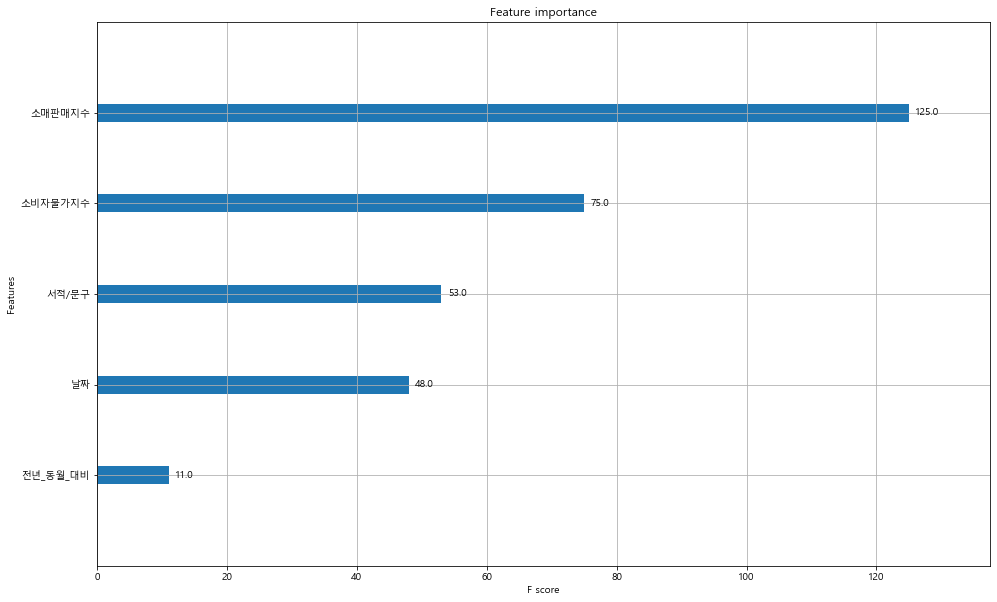

In [295]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(16,10))
plot_importance(xgb_clf, ax=ax)

In [305]:
from sklearn.tree import export_graphviz
from sklearn import tree

feature_names = ["날짜", "등락률", "소비자물가지수", "소매판매지수",  "전년_동월_대비"]
target_names = ["0", "1"]

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))
export_graphviz(dt_clf, 
                out_file="tree_corona.dot",
                class_names=target_names, 
                feature_names=feature_names, 
                impurity=True, 
                filled=True, 
                rounded=True
                )

<Figure size 1152x720 with 0 Axes>

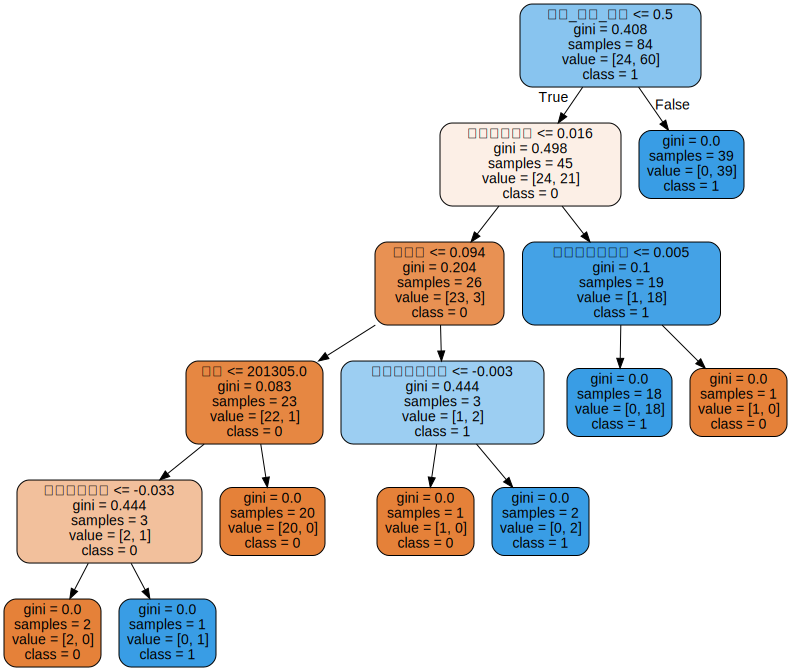

In [307]:
import graphviz

with open('./data/tree_corona.dot', encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)